<h1>User Engagement Analysis</h1>

In [42]:
# Importing the neccesary libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [32]:
# Reading the data 

engagement_data = pd.read_csv('../data/user_overview_data.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [33]:
# Rename the columns for simplicity

engagement_data.rename(columns={'Bearer Id':'Session Frequency', 'Dur. (ms)':'Total Duration', 'Total_UL_and_DL':'Total traffic in MBs'}, inplace= True)

In [34]:
# Grouping and aggregating the data

engagement_data = engagement_data.groupby('MSISDN/Number')
engagement_data = engagement_data.agg({'Session Frequency':'count','Total Duration':'sum','Total traffic in MBs':'sum'})

In [35]:
# Creating a data set containing only the specified metrics

engagement_cols = ['Session Frequency', 'Total Duration', 'Total traffic in MBs']
engagement_agg = engagement_data[engagement_cols]

In [36]:
# Sorting to see the top 10 users based on session frequency metric

engagement_agg = engagement_agg.sort_values(by='Session Frequency', ascending=False)
engagement_agg.head(10)

,Session Frequency,Total Duration,Total traffic in MBs
MSISDN/Number,,,
33626320676.000,18,1785419.000,7971.167
33614892860.000,17,1678397.000,7602.058
33625779332.000,17,1599052.000,7708.276
33659725664.000,16,1905478.000,6932.267
33760536639.000,15,1651084.000,8514.774
33675877202.000,15,1745131.000,7891.111
33667163239.000,13,1209703.000,5618.394
33604515716.000,12,1193033.000,5081.583
33760413819.000,12,1248477.000,5902.169


In [37]:
# Sorting to see the top 10 users based on Total duration metric

engagement_agg = engagement_agg.sort_values(by='Total Duration', ascending=False)
engagement_agg.head(10)

,Session Frequency,Total Duration,Total traffic in MBs
MSISDN/Number,,,
33659725664.000,16,1905478.000,6932.267
33626320676.000,18,1785419.000,7971.167
33659359429.000,11,1747994.000,4658.437
33675877202.000,15,1745131.000,7891.111
33614892860.000,17,1678397.000,7602.058
33760536639.000,15,1651084.000,8514.774
33625779332.000,17,1599052.000,7708.276
33786323068.000,12,1427807.000,5622.232
33664712899.000,11,1334982.000,6472.786


In [38]:
# Sorting to see the top 10 users based on Total traffic in MBs

engagement_agg = engagement_agg.sort_values(by='Total traffic in MBs', ascending=False)
engagement_agg.head(10)

,Session Frequency,Total Duration,Total traffic in MBs
MSISDN/Number,,,
33760536639.000,15,1651084.000,8514.774
33626320676.000,18,1785419.000,7971.167
33675877202.000,15,1745131.000,7891.111
33625779332.000,17,1599052.000,7708.276
33614892860.000,17,1678397.000,7602.058
33659725664.000,16,1905478.000,6932.267
33666464084.000,11,1168703.000,6530.983
33664712899.000,11,1334982.000,6472.786
33698792269.000,11,1052303.000,6149.754


In [39]:
# Finiding out the metric features and normalizing them

features = ['Session Frequency','Total Duration','Total traffic in MBs']
features_array = engagement_agg.loc[:,features].values
features_array = StandardScaler().fit_transform(features_array)
features_array

array([[16.85918142, 15.12169104, 16.85321169],
       [20.57669774, 16.45580955, 15.68633385],
       [16.85918142, 16.05569814, 15.51448841],
       ...,
       [-0.48922805,  0.61443461, -1.35117693],
       [-0.48922805,  0.37483255, -1.35208661],
       [-0.48922805, -0.85007167, -1.35278816]])

In [40]:
# Making sure if the data is normalized well or not
# Normalized data has a mean of 0 and std of 1

np.mean(features_array), np.std(features_array), features_array.shape

(1.138957652660259e-17, 1.0, (106471, 3))

In [41]:
# Changing my array into dataframe

normalized_data = pd.DataFrame(features_array,columns=features)
normalized_data

,Session Frequency,Total Duration,Total traffic in MBs
0,16.859,15.122,16.853
1,20.577,16.456,15.686
2,16.859,16.056,15.514
3,19.338,14.605,15.122
4,19.338,15.393,14.894
...,...,...,...
106466,-0.489,-0.895,-1.343
106467,-0.489,-0.256,-1.343
106468,-0.489,0.614,-1.351
106469,-0.489,0.375,-1.352


In [48]:
# Fitting the data with kmeans of k=3

kmeans = KMeans(3)
kmeans.fit(features_array)
clusters = kmeans.fit_predict(features_array)
clusters

array([2, 2, 2, ..., 1, 1, 1])

In [52]:
# Adding a new column to the normalized_data

normalized_data['cluster_num'] = clusters
normalized_data

,Session Frequency,Total Duration,Total traffic in MBs,cluster_num
0,16.859,15.122,16.853,2
1,20.577,16.456,15.686,2
2,16.859,16.056,15.514,2
3,19.338,14.605,15.122,2
4,19.338,15.393,14.894,2
...,...,...,...,...
106466,-0.489,-0.895,-1.343,1
106467,-0.489,-0.256,-1.343,1
106468,-0.489,0.614,-1.351,1
106469,-0.489,0.375,-1.352,1


In [67]:
# Copying the data frame and adding a new column 

non_nomalized_data = engagement_agg[features]
non_nomalized_data['cluster'] = clusters
non_nomalized_data

,Session Frequency,Total Duration,Total traffic in MBs,cluster
MSISDN/Number,,,,
33760536639.000,15,1651084.000,8514.774,2
33626320676.000,18,1785419.000,7971.167,2
33675877202.000,15,1745131.000,7891.111,2
33625779332.000,17,1599052.000,7708.276,2
33614892860.000,17,1678397.000,7602.058,2
...,...,...,...,...
33675475328.000,1,38371.000,38.022,1
33782507973.000,1,102689.000,37.929,1
33666684512.000,1,190320.000,34.000,1


In [83]:
# Create a new cluster_max dataframe and put the max values of the metrics inside it

cluster_max_dataframe = pd.DataFrame()
xDR_max = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('max')
Total_duration_max = non_nomalized_data.groupby([clusters])['Total Duration'].agg('max') 	
Total_traffic_max = non_nomalized_data.groupby([clusters])['Total traffic in MBs'].agg('max')	
cluster_max_dataframe['xDR Max']=xDR_max
cluster_max_dataframe['Duration Max']=Total_duration_max
cluster_max_dataframe['Traffic Max']=Total_traffic_max
cluster_max_dataframe

,xDR Max,Duration Max,Traffic Max
0,4,514316.000,2345.859
1,2,241989.000,934.648
2,18,1905478.000,8514.774


In [84]:
# Create a new cluster_min dataframe and put the min values of the metrics inside it

cluster_min_dataframe = pd.DataFrame()
xDR_min = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('min')
Total_duration_min = non_nomalized_data.groupby([clusters])['Total Duration'].agg('min') 	
Total_traffic_min = non_nomalized_data.groupby([clusters])['Total traffic in MBs'].agg('min')	
cluster_min_dataframe['xDR Min']=xDR_min
cluster_min_dataframe['Duration Min']=Total_duration_min
cluster_min_dataframe['Traffic Min']=Total_traffic_min
cluster_min_dataframe

,xDR Min,Duration Min,Traffic Min
0,1,18235.000,166.910
1,1,7142.000,33.249
2,3,66594.000,661.852


In [85]:
# Create a new cluster_mean dataframe and put the mean values of the metrics inside it

cluster_mean_dataframe = pd.DataFrame()
xDR_mean = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('mean')
Total_duration_mean = non_nomalized_data.groupby([clusters])['Total Duration'].agg('mean') 	
Total_traffic_mean = non_nomalized_data.groupby([clusters])['Total traffic in MBs'].agg('mean')	
cluster_mean_dataframe['xDR Mean']=xDR_mean
cluster_mean_dataframe['Duration Mean']=Total_duration_mean
cluster_mean_dataframe['Traffic Mean']=Total_traffic_mean
cluster_mean_dataframe

,xDR Mean,Duration Mean,Traffic Mean
0,2.140,191956.133,1042.074
1,1.028,93293.162,477.812
2,4.167,434187.737,2060.865


In [87]:
# Finding out the number of total values per cluster

cluster_count_dataframe = pd.DataFrame()
xDR_count = non_nomalized_data.groupby([clusters])['Session Frequency'].agg('count')
cluster_count_dataframe['counts']=xDR_count
cluster_count_dataframe

,counts
0,22465
1,79527
2,4479


<AxesSubplot:title={'center':'Maximum total traffic distribution per cluster'}, ylabel='Traffic Max'>

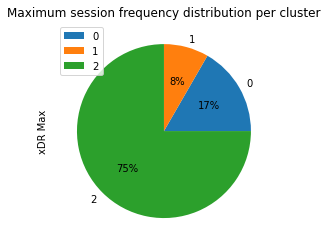

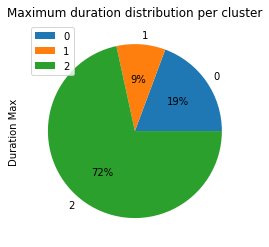

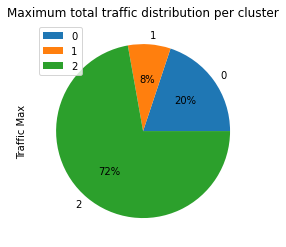

In [98]:
# Create a max_values pie chart per cluster

cluster_max_dataframe.plot(kind='pie',y='xDR Max',autopct='%1.0f%%',title='Maximum session frequency distribution per cluster')
cluster_max_dataframe.plot(kind='pie',y='Duration Max',autopct='%1.0f%%',title='Maximum duration distribution per cluster')
cluster_max_dataframe.plot(kind='pie',y='Traffic Max',autopct='%1.0f%%',title='Maximum total traffic distribution per cluster')